In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.graph_objects as go
import plotly.express as px

# sns.set_theme(palette='Set2', style=sns.axes_style(
#     style='darkgrid', 
#     rc={'axes.edgecolor': 'white',
#         'xtick.color': 'grey', 
#         'ytick.color': 'grey', 
#         'axes.spines.top': True}))

## Уравнение прямой

In [2]:
a_variants = np.arange(-5, 6, 1)
b_variants = a_variants / 10
ab_combinations1 = pd.DataFrame(itertools.product([0], b_variants), columns=['a', 'b'])
ab_combinations2 = pd.DataFrame(itertools.product(a_variants, [0]), columns=['a', 'b'])
ab_combinations_frame = pd.concat([ab_combinations1, ab_combinations2], ignore_index=True)
ab_combinations_frame['x1'] = [-2] * len(ab_combinations_frame)
ab_combinations_frame['x2'] = [2] * len(ab_combinations_frame)
ab_combinations_frame['y1'] = ab_combinations_frame['a'] * ab_combinations_frame['x1'] + ab_combinations_frame['b']
ab_combinations_frame['y2'] = ab_combinations_frame['a'] * ab_combinations_frame['x2'] + ab_combinations_frame['b']
ab_combinations_frame.drop_duplicates(inplace=True)

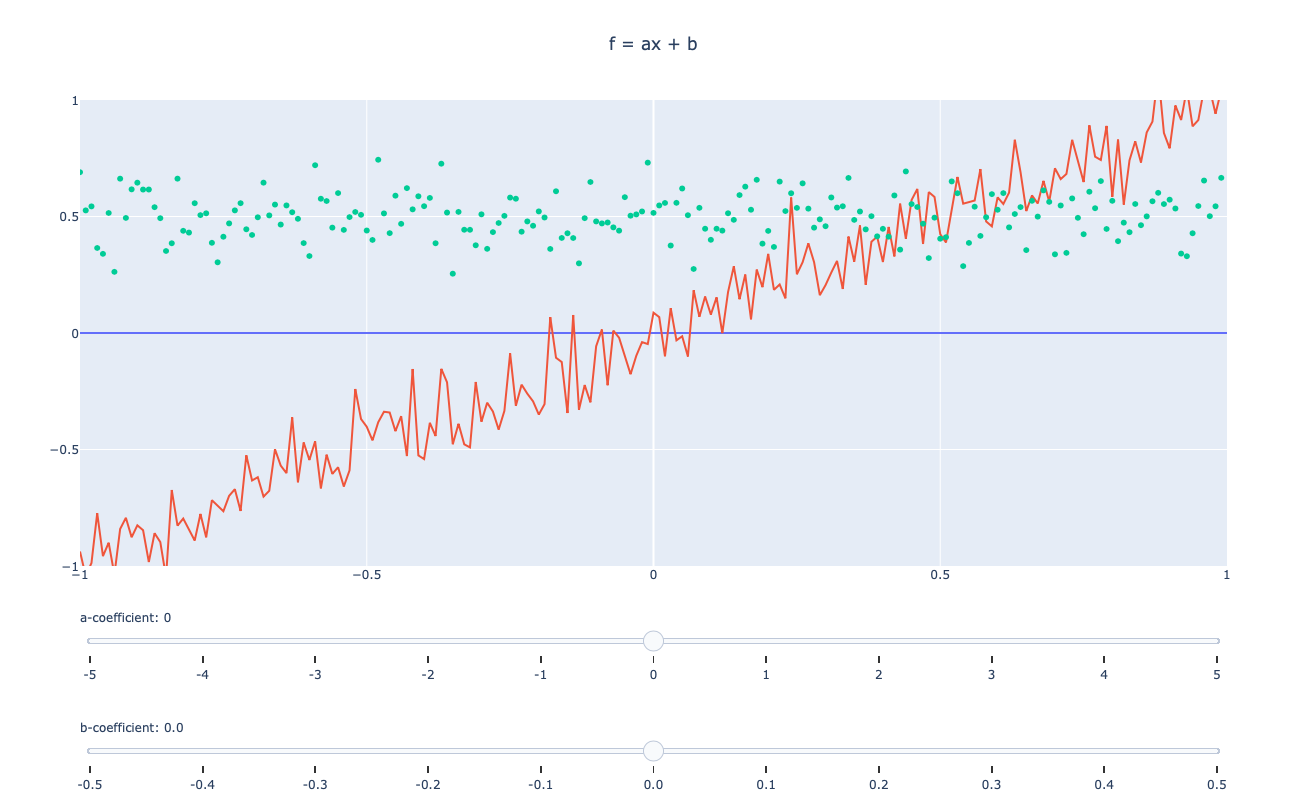

In [17]:
fig = go.Figure()

for i in ab_combinations_frame.index:
    rec = ab_combinations_frame.loc[i]
    fig.add_trace(
        go.Line(
            visible=False,
            x=rec[['x1', 'x2']],
            y=rec[['y1', 'y2']]))

fig.add_trace(go.Scatter(x=np.arange(200) / 100 - 1, 
                         y=np.arange(200) / 100 - 1 + np.random.normal(loc=0, scale=0.1, size=200)))

fig.add_trace(go.Scatter(x=np.arange(200) / 100 - 1, 
                         y=np.ones(200) - 0.5 + np.random.normal(loc=0, scale=0.1, size=200),
                         mode='markers'))

    
fig.data[5].visible = True
fig.data[-1].visible = True
fig.data[-2].visible = True

a_steps = []
for a in a_variants:
    step = dict(method="update",
                args=[{"visible": [*list((ab_combinations_frame.a == a) & (ab_combinations_frame.b == 0)), True, True]}],
                label=str(a))
    a_steps.append(step)

b_steps = []
for b in b_variants:
    step = dict(method="update",
                args=[{"visible": [*list((ab_combinations_frame.b == b) & (ab_combinations_frame.a == 0)), True, True]}],
                label=str(b))
    b_steps.append(step)
    
sliders = [dict(active=5,
                currentvalue={"prefix": "a-coefficient: "},
                pad={"t": 40},
                steps=a_steps),
           dict(active=5,
                currentvalue={"prefix": "b-coefficient: "},
                pad={"t": 150},
                steps=b_steps)]

fig.update_layout(width=800, height=800, 
                  sliders=sliders, 
                  title='f = ax + b', title_x=0.5, 
                  showlegend=False)
fig.update_yaxes(range=[-1, 1])
fig.update_xaxes(range=[-1, 1])
fig.show()

## Задачи, которые решает линейная регрессия

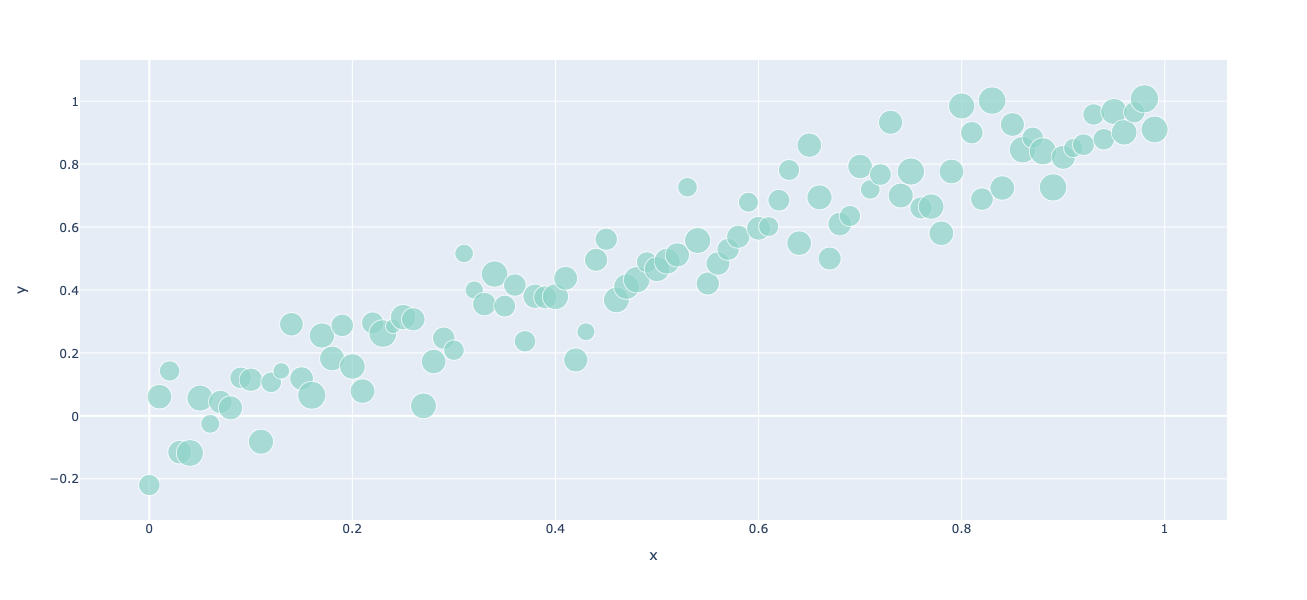

In [25]:
px.scatter(x=np.arange(100) / 100, 
           y=np.arange(100) / 100 + np.random.normal(loc=0, scale=0.1, size=100),
           size=np.ones(100) + np.random.normal(loc=0, scale=0.2, size=100), 
           color_discrete_sequence=px.colors.qualitative.Set3,
           height=600)

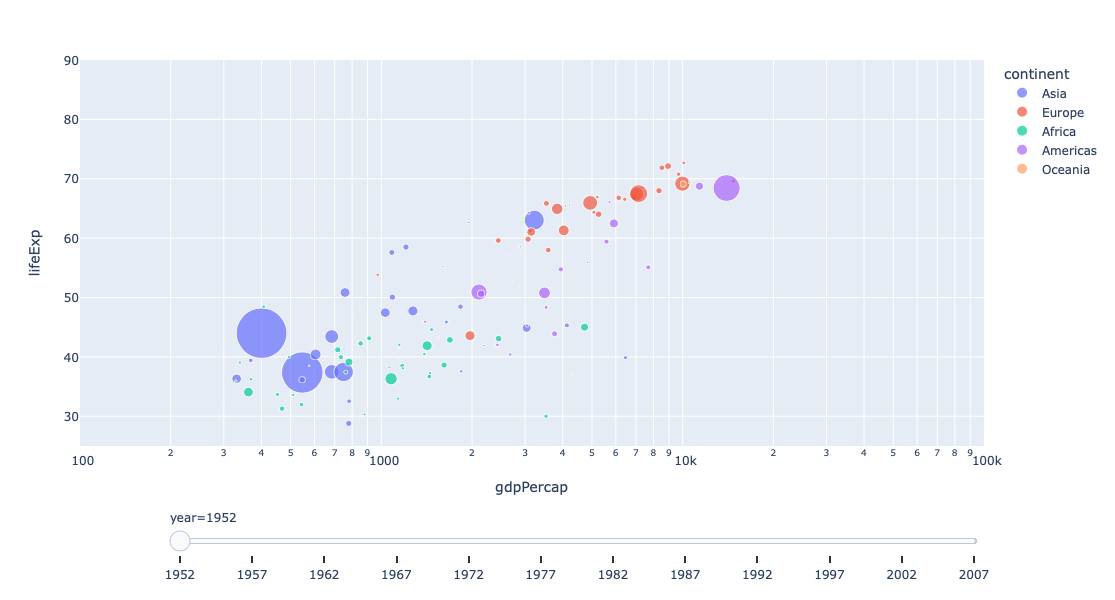

In [10]:
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.update_layout(height=600)
fig.show()

In [31]:
df = px.data.tips()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


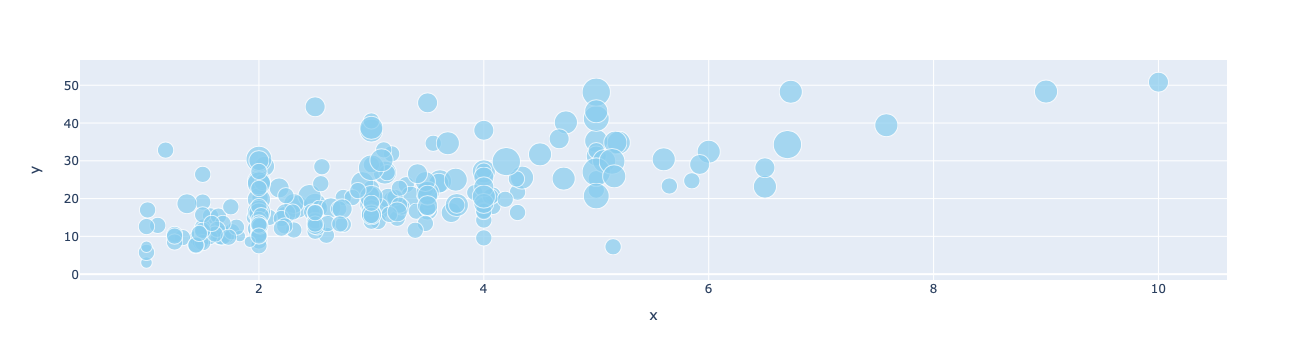

In [33]:
px.scatter(x=df['tip'], y=df['total_bill'], size=df['size'], color_discrete_sequence=px.colors.qualitative.Safe)

## Задачи, которые не решает линейная регрессия

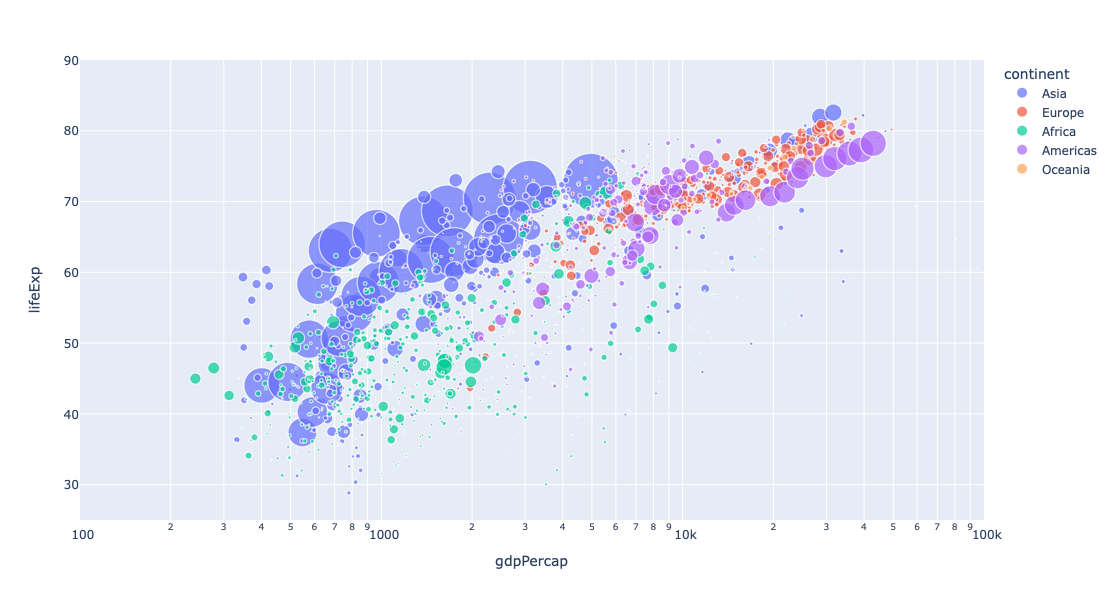

In [15]:
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.update_layout(height=600)
fig.show()

In [146]:
px.data.carshare()

,centroid_lat,centroid_lon,car_hours,peak_hour
0,45.471549,-73.588684,1772.750000,2
1,45.543865,-73.562456,986.333333,23
2,45.487640,-73.642767,354.750000,20
3,45.522870,-73.595677,560.166667,23
4,45.453971,-73.738946,2836.666667,19
...,...,...,...,...
244,45.547171,-73.556258,951.416667,3
245,45.546482,-73.574939,795.416667,2
246,45.495523,-73.627725,425.750000,8
247,45.521199,-73.581789,1044.833333,17
